<a href="https://colab.research.google.com/github/pvpogorelova/metrics_24_25/blob/main/sem_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Семинар 7.
# Сезонные дамми-переменные.

import pandas as pd # работа с таблицами
import numpy as np # математические функции и матрицы
import matplotlib.pyplot as plt # графики
import seaborn as sns # еще более классные графики
import statsmodels.api as sm # стандартные регрессионные модели
import statsmodels.formula.api as smf # аналогичные модели с синтаксисом в стиле R
import statsmodels.graphics.gofplots as gf # визуализация моделей
import statsmodels.discrete.discrete_model # дискретные модели
from statsmodels.stats.outliers_influence import summary_table # работа с выбросами
from scipy.stats import shapiro # тест Шапиро – Уилка
import math

In [2]:
# При желании можем настроить графики по своему вкусу, изменив стиль и другие параметры шрифтов и графиков
# (https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html)

plt.style.use('seaborn')
plt.rc('font', size=14)
plt.rc('figure', titlesize=15)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=15)

<ipython-input-2-e6cb9758f8b8>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [4]:
# Импортируем данные об экономике Баккардии

data = pd.read_excel('Chow_2.xls')
data

,Year,Quarter,C,Y,D1,D2,D3,D4
0,2015,1,76.11,92.12,1,0,0,0
1,2015,2,75.80,95.01,0,1,0,0
2,2015,3,79.54,95.27,0,0,1,0
3,2015,4,80.07,97.05,0,0,0,1
4,2016,1,81.86,97.06,1,0,0,0
5,2016,2,82.57,98.99,0,1,0,0
6,2016,3,84.00,99.02,0,0,1,0
7,2016,4,81.33,94.34,0,0,0,1
8,2017,1,78.64,95.50,1,0,0,0
9,2017,2,79.08,98.25,0,1,0,0


In [5]:

# Создадим дамми переменные для факторной переменной Quarter (номер квартала)

pd.get_dummies(data, columns = ["Quarter"],drop_first = True)

,Year,C,Y,D1,D2,D3,D4,Quarter_2,Quarter_3,Quarter_4
0,2015,76.11,92.12,1,0,0,0,False,False,False
1,2015,75.80,95.01,0,1,0,0,True,False,False
2,2015,79.54,95.27,0,0,1,0,False,True,False
3,2015,80.07,97.05,0,0,0,1,False,False,True
4,2016,81.86,97.06,1,0,0,0,False,False,False
5,2016,82.57,98.99,0,1,0,0,True,False,False
6,2016,84.00,99.02,0,0,1,0,False,True,False
7,2016,81.33,94.34,0,0,0,1,False,False,True
8,2017,78.64,95.50,1,0,0,0,False,False,False
9,2017,79.08,98.25,0,1,0,0,True,False,False


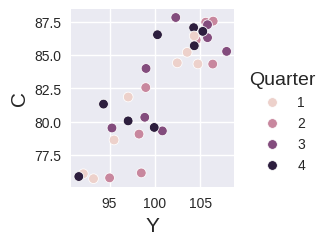

In [6]:
# Построим диаграмму рассеяния потребления от дохода, учитывая номер квартала, к которому относится наблюдение

sns.pairplot(data,x_vars = ['Y'],y_vars=['C'],hue = 'Quarter')

In [9]:
# Оценим модель регрессии для потребления, используя в качестве объясняющих переменных доход и квартал (сезонность)

model_1 = smf.ols('C ~ Y + D2 + D3 + D4', data = data).fit()
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                      C   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     22.79
Date:                Fri, 18 Oct 2024   Prob (F-statistic):           2.53e-08
Time:                        08:36:37   Log-Likelihood:                -66.356
No. Observations:                  32   AIC:                             142.7
Df Residuals:                      27   BIC:                             150.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.8255      8.275      0.583      0.5

In [10]:
# Проверим гипотезу об отсутствии сезонности

hypotheses = '(D2 = D3 = D4 = 0)' # формулируем гипотезу H_0
print(model_1.f_test(r_matrix = hypotheses)) # тестируем гипотезу с помощью F-теста

<F test: F=1.2961278194597616, p=0.29595511594426166, df_denom=27, df_num=3>


In [12]:
# Оценим эту же модель, но включим все дамми на сезонность, исключив константу

model_1_wc = smf.ols('C ~ 0 + Y + D1 + D2 + D3 + D4', data = data).fit()
print(model_1_wc.summary())# получили тот же самый результат, что и в модели model_1

                            OLS Regression Results                            
Dep. Variable:                      C   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     22.79
Date:                Fri, 18 Oct 2024   Prob (F-statistic):           2.53e-08
Time:                        08:37:15   Log-Likelihood:                -66.356
No. Observations:                  32   AIC:                             142.7
Df Residuals:                      27   BIC:                             150.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Y              0.7745      0.083      9.315      0.0

In [13]:
# Создадим переменные взаимодействия (перекрестные переменные), чтобы учесть возможную разную зависимость потребления
# от дохода в разные кварталы

data['yq2'] = data['Y']*data['D2']
data['yq3'] = data['Y']*data['D3']
data['yq4'] = data['Y']*data['D4']

data

,Year,Quarter,C,Y,D1,D2,D3,D4,yq2,yq3,yq4
0,2015,1,76.11,92.12,1,0,0,0,0.00,0.00,0.00
1,2015,2,75.80,95.01,0,1,0,0,95.01,0.00,0.00
2,2015,3,79.54,95.27,0,0,1,0,0.00,95.27,0.00
3,2015,4,80.07,97.05,0,0,0,1,0.00,0.00,97.05
4,2016,1,81.86,97.06,1,0,0,0,0.00,0.00,0.00
5,2016,2,82.57,98.99,0,1,0,0,98.99,0.00,0.00
6,2016,3,84.00,99.02,0,0,1,0,0.00,99.02,0.00
7,2016,4,81.33,94.34,0,0,0,1,0.00,0.00,94.34
8,2017,1,78.64,95.50,1,0,0,0,0.00,0.00,0.00
9,2017,2,79.08,98.25,0,1,0,0,98.25,0.00,0.00


In [15]:
# Оценим модель, учитывающую переменные взаимодействия

model_2 = smf.ols('C ~ Y + D2 + D3 + D4 + yq2 + yq3 + yq4', data = data).fit()
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                      C   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     13.04
Date:                Fri, 18 Oct 2024   Prob (F-statistic):           8.19e-07
Time:                        08:37:41   Log-Likelihood:                -64.868
No. Observations:                  32   AIC:                             145.7
Df Residuals:                      24   BIC:                             157.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.9411     15.264      0.258      0.7